In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [29]:
(x_train, y_train), (x_test, y_test)=data
len(x_train)

60000

In [30]:
x_train[0].shape

(28, 28)

In [31]:
x_train=x_train/255
x_test=x_test/255
#scale data for better performance

In [32]:
y_train[0]

5

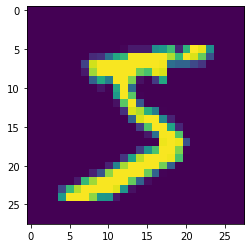

In [33]:
plt.imshow(x_train[0])

In [36]:
#Flatten
x_flatten=x_train.reshape(len(x_train),28*28)
x_flatten[0][:5]

array([0., 0., 0., 0., 0.])

In [37]:
x_test_flatten=x_test.reshape(len(x_test),28*28)

## Using one layers

In [38]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_flatten, y_train, epochs=5)
    

Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4886 - acc: 0.8784
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3061 - acc: 0.9161
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2851 - acc: 0.9212
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2751 - acc: 0.9240
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2677 - acc: 0.9268


In [39]:
model.evaluate(x_test_flatten, y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.2666 - acc: 0.9255


[0.26659904988110067, 0.9255]

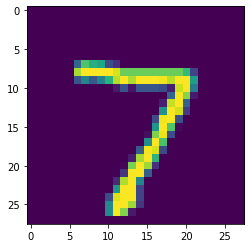

In [40]:
y_pred=model.predict(x_test_flatten)
plt.imshow(x_test[0])

In [41]:
y_pred[0]

array([1.8060207e-05, 0.0000000e+00, 4.8547983e-05, 7.1924627e-03,
       1.4901161e-06, 8.8334084e-05, 0.0000000e+00, 7.4130440e-01,
       7.4625015e-05, 9.0801716e-04], dtype=float32)

In [42]:
np.argmax(y_pred[0])

7

In [43]:
predict_label=[np.argmax(i) for i in y_pred]

In [49]:
predict_label[:5]

[7, 2, 1, 0, 4]

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [53]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=predict_label)
print('Confusion Matrix:\n \n',cm)

Confusion Matrix:
 
 Tensor("confusion_matrix_6/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)


In [52]:
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(cm,feed_dict=None, session=None))

Confusion Matrix: 

 [[ 960    0    2    2    0    6    6    2    2    0]
 [   0 1117    4    1    0    1    4    2    6    0]
 [   4    9  936   12    8    6   12    9   32    4]
 [   5    1   25  890    0   45    2   11   20   11]
 [   1    1    3    1  915    0   12    4    7   38]
 [   8    2    2   15   10  802   14    4   28    7]
 [   7    3    7    1    8   17  910    2    3    0]
 [   1    7   25    3    8    1    0  941    2   40]
 [   6   11    7   18    9   37    9    9  860    8]
 [   9    7    1    8   25    7    0   18   10  924]]


## Adding more layers

In [54]:
model=keras.Sequential([]
    #keras.Flatten(input_shape(28,28)),
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
                       keras.layers.Dense(10, activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_flatten #x_train
          , y_train, epochs=5)
    

Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2961 - acc: 0.9178
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1443 - acc: 0.9577
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1050 - acc: 0.9687
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0823 - acc: 0.9754
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0668 - acc: 0.9797


In [55]:
model.evaluate(x_test_flatten, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0866 - acc: 0.9748


[0.08659245279808529, 0.9748]

In [57]:
y_pred_2=model.predict(x_test_flatten)

In [58]:
predict_label=[np.argmax(i) for i in y_pred_2]

In [59]:
cm_2=tf.math.confusion_matrix(y_test, predict_label)
with tf.Session():
       print('Confusion Matrix: \n\n', tf.Tensor.eval(cm_2,feed_dict=None, session=None))

Confusion Matrix: 

 [[ 967    0    2    2    0    2    3    1    1    2]
 [   0 1118    8    1    0    1    3    1    3    0]
 [   3    0 1010    4    3    0    3    5    4    0]
 [   0    0    5  991    2    2    0    5    3    2]
 [   0    0    5    1  961    0    3    2    2    8]
 [   5    0    0   11    2  862    4    1    5    2]
 [   6    3    3    1    5    4  933    0    3    0]
 [   1    3   11    3    0    0    0 1003    4    3]
 [   3    0    7   14    5    1    2    5  934    3]
 [   4    3    0   10   13    2    0    8    0  969]]
